In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Checking my current directory
import os
print(os.getcwd())

C:\Users\prati\1 ARTIFICIAL INTELLIGENCE\3 MACHINE LEARNING\ALL_ALGORITHMS


In [3]:
#checking the list of directories
os.listdir()

['.ipynb_checkpoints',
 'Linear_Regression_Algorithm.ipynb',
 'Property_data_Linear_Reg.csv']

# Basic Steps

In [5]:
data = pd.read_csv('Property_data_Linear_Reg.csv')

In [6]:
pd.set_option('display.max_columns', None) # this shows all columns in table

In [7]:
data

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,NaN,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,I,GS,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,TF,0,NaN,Attchd,2004.0,RFn,2,689.060909,TA,TA,Y,-9.973961,-9.267967,126.676547,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,SS,VinylSd,VinylSd,NaN,0.0,TA,TA,PC,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,TF,1,TA,Attchd,1999.0,RFn,2,644.100240,TA,TA,Y,-80.348891,113.043436,125.521880,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Pa

# Data Cleaning/Preprosessing

In [9]:
data.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [10]:
# Display important Columns
new_data = data[['Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition', 'Remodel_Year', 'Kitchen_Quality', 'Construction_Year', 'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Garage_Area', 'Sale_Price']]
print(new_data.shape[1])

14


In [11]:
new_data.head(5)

,Lot_Size,Neighborhood,Overall_Material,House_Condition,Remodel_Year,Kitchen_Quality,Construction_Year,Total_Basement_Area,Air_Conditioning,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Garage_Area,Sale_Price
0,8450,CollgCr,7,5,2003,Gd,2003,856,Y,856,854,1710,1085.793744,208500
1,9600,Veenker,6,8,1976,TA,1976,1262,Y,1262,0,1262,196.316304,181500
2,11250,CollgCr,7,5,2002,Gd,2001,920,Y,920,866,1786,218.068403,223500
3,9550,Crawfor,7,5,1970,Gd,1915,756,Y,961,756,1717,696.996439,140000
4,14260,NoRidge,8,5,2000,Gd,2000,1145,Y,1145,1053,2198,568.859882,250000


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lot_Size             1459 non-null   int64  
 1   Neighborhood         1459 non-null   object 
 2   Overall_Material     1459 non-null   int64  
 3   House_Condition      1459 non-null   int64  
 4   Remodel_Year         1459 non-null   int64  
 5   Kitchen_Quality      1459 non-null   object 
 6   Construction_Year    1459 non-null   int64  
 7   Total_Basement_Area  1459 non-null   int64  
 8   Air_Conditioning     1459 non-null   object 
 9   First_Floor_Area     1459 non-null   int64  
 10  Second_Floor_Area    1459 non-null   int64  
 11  Grade_Living_Area    1459 non-null   int64  
 12  Garage_Area          1459 non-null   float64
 13  Sale_Price           1459 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 159.7+ KB


In [13]:
new_data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [14]:
new_data['Kitchen_Quality'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [15]:
new_data['Air_Conditioning'].unique()

array(['Y', 'N'], dtype=object)

# EDA

In [17]:
## step 1: Finding missing values
new_data.isnull().sum()

Lot_Size               0
Neighborhood           0
Overall_Material       0
House_Condition        0
Remodel_Year           0
Kitchen_Quality        0
Construction_Year      0
Total_Basement_Area    0
Air_Conditioning       0
First_Floor_Area       0
Second_Floor_Area      0
Grade_Living_Area      0
Garage_Area            0
Sale_Price             0
dtype: int64

In [18]:
# step 2: Finding duplicate values
new_data.duplicated().sum()

0

In [19]:
# step 3: Convert categorical into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data['Air_Conditioning'] = le.fit_transform(new_data['Air_Conditioning'])
new_data['Kitchen_Quality'] = le.fit_transform(new_data['Kitchen_Quality'])
new_data['Neighborhood'] = le.fit_transform(new_data['Neighborhood'])

In [20]:
# step 4: Checking zeros

cols = [
    'Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition',
    'Remodel_Year', 'Kitchen_Quality', 'Construction_Year', 
    'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area', 
    'Second_Floor_Area', 'Grade_Living_Area', 'Garage_Area', 'Sale_Price'
]

for col in cols:
    print((new_data[col] == 0).sum())

0
17
0
0
0
100
0
37
95
0
828
0
0
0


In [21]:
# Treating zeros

median_value = new_data['Neighborhood'].median()
new_data['Neighborhood'] = new_data['Neighborhood'].replace(0, median_value)

median_value = new_data['Kitchen_Quality'].median()
new_data['Kitchen_Quality'] = new_data['Kitchen_Quality'].replace(0, median_value)

median_value = new_data['Total_Basement_Area'].median()
new_data['Total_Basement_Area'] = new_data['Total_Basement_Area'].replace(0, median_value)

median_value = new_data['Air_Conditioning'].median()
new_data['Air_Conditioning'] = new_data['Air_Conditioning'].replace(0, median_value)

median_value = new_data.loc[new_data['Second_Floor_Area'] != 0, 'Second_Floor_Area'].median()
new_data['Second_Floor_Area'] = new_data['Second_Floor_Area'].replace(0, median_value)

In [22]:
# Double run the checking zero cell to confirm zores removed or not
cols = [
    'Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition',
    'Remodel_Year', 'Kitchen_Quality', 'Construction_Year', 
    'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area', 
    'Second_Floor_Area', 'Grade_Living_Area', 'Garage_Area', 'Sale_Price'
]

for col in cols:
    print((new_data[col] == 0).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


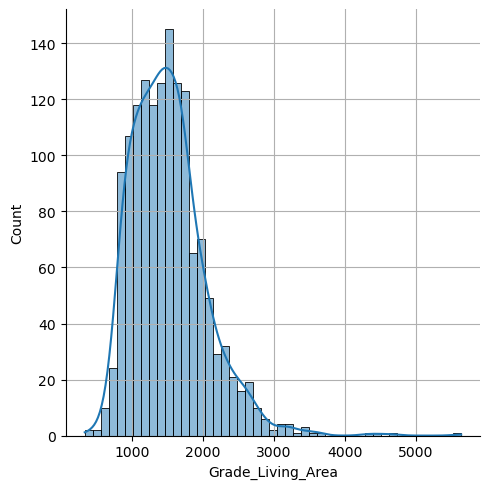

In [23]:
# Step 4: Analysis using plots
# 1- univariate Analysis(draw the graph for single column)

sns.displot(x=data.Grade_Living_Area, kde=True) # kde shows line that the graph is uniformly distributed or not
plt.grid(True)

In [24]:
new_data['Grade_Living_Area'] = np.log(new_data['Grade_Living_Area'] + 1)

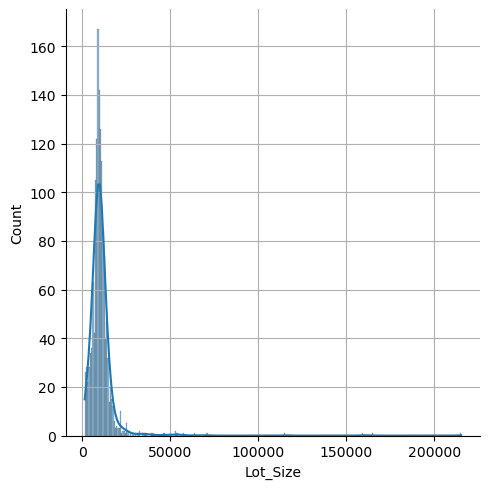

In [25]:
sns.displot(x=data.Lot_Size, kde=True)
plt.grid(True)

In [26]:
new_data['Lot_Size'] = np.log(new_data['Lot_Size'] + 1)

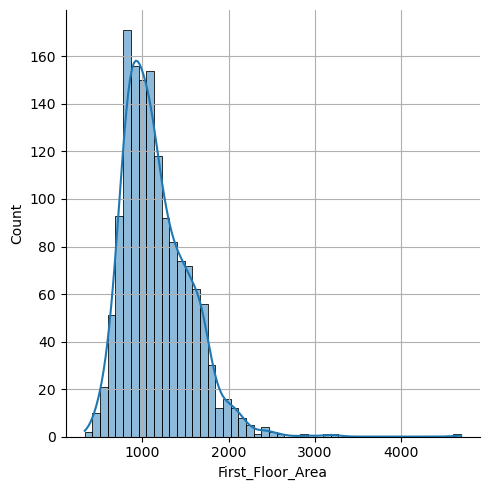

In [27]:
sns.displot(x=data.First_Floor_Area, kde=True)
plt.grid(True)

In [28]:
new_data['First_Floor_Area'] = np.log(new_data['First_Floor_Area'] + 1)

In [29]:
# new_data['Second_Floor_Area'].tolist() 
# To access all values in column we use this

In [30]:
new_data['Second_Floor_Area'].dtype

dtype('int64')

In [31]:
(new_data['Second_Floor_Area'] == 0).sum()

0

In [32]:
new_data['Second_Floor_Area'].median()

776.0

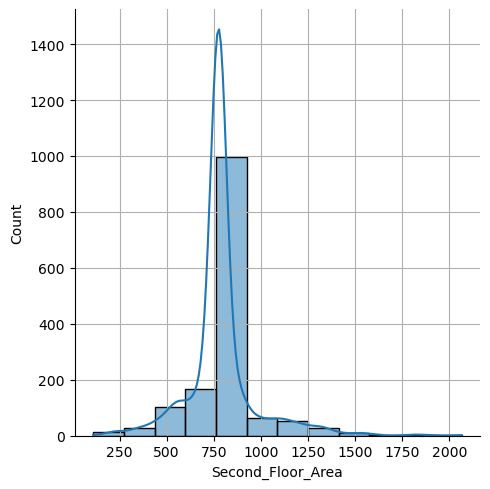

In [33]:
sns.displot(x=new_data.Second_Floor_Area, kde=True)
plt.grid(True)

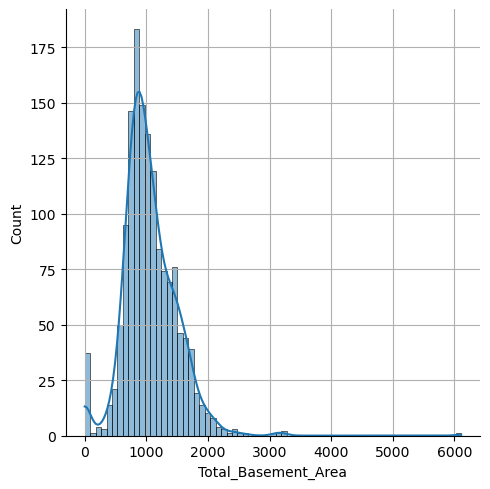

In [34]:
sns.displot(x=data.Total_Basement_Area, kde=True)
plt.grid(True)

In [35]:
new_data['Total_Basement_Area'] = np.log(new_data['Total_Basement_Area'] + 1)

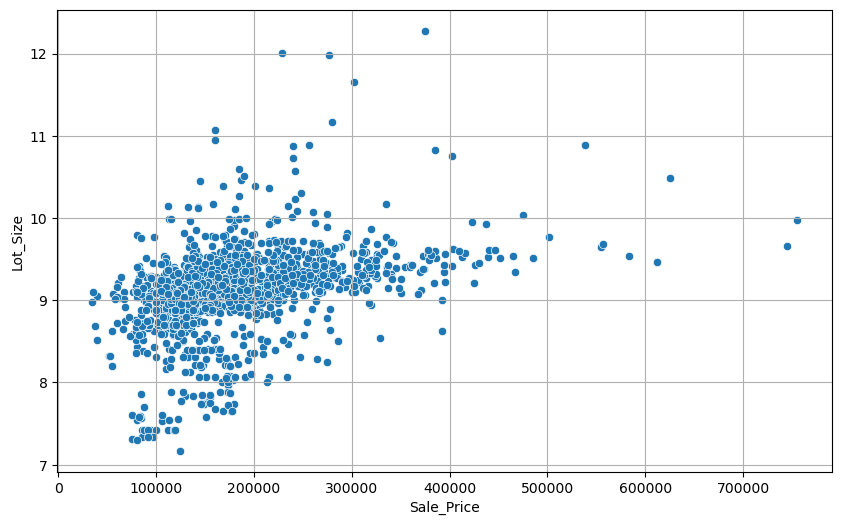

In [36]:
# 2 - Bivariate Analysis
# This step is performed when input variable and output variable are known.

plt.figure(figsize=(10,6))
sns.scatterplot(x=new_data.Sale_Price, y=new_data.Lot_Size, data=new_data, )
plt.grid(True)
plt.show()

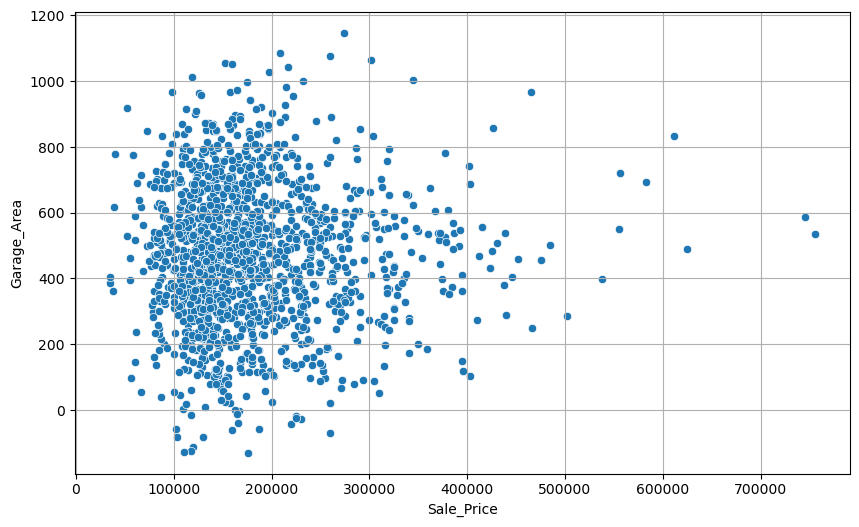

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=new_data.Sale_Price, y=new_data.Garage_Area, data=new_data, )
plt.grid(True)
plt.show() 

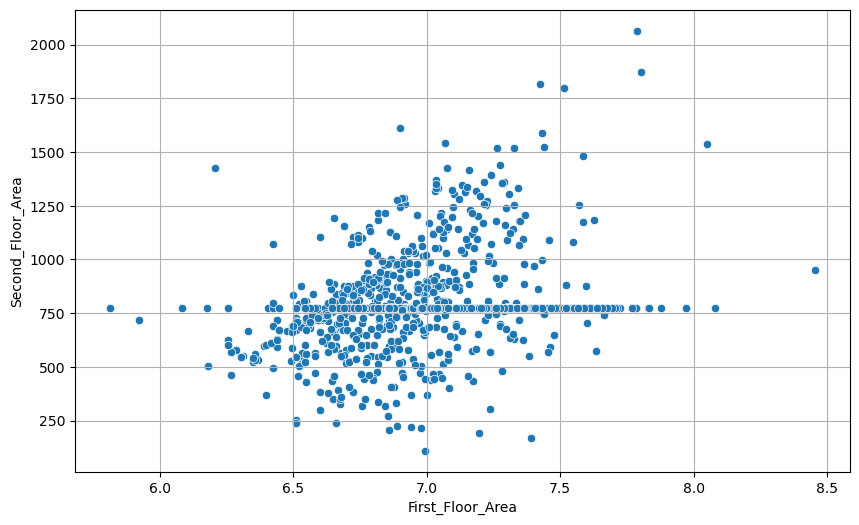

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='First_Floor_Area', y='Second_Floor_Area', data=new_data, )
plt.grid(True)
plt.show() 

In [39]:
# 3 - multivariate analysis
# sns.pairplot(new_data) 
# Not able to understand behaviour of data because of multple graphs

In [40]:
new_data.head()

,Lot_Size,Neighborhood,Overall_Material,House_Condition,Remodel_Year,Kitchen_Quality,Construction_Year,Total_Basement_Area,Air_Conditioning,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Garage_Area,Sale_Price
0,9.042040,5,7,5,2003,2,2003,6.753438,1,6.753438,854,7.444833,1085.793744,208500
1,9.169623,24,6,8,1976,3,1976,7.141245,1,7.141245,776,7.141245,196.316304,181500
2,9.328212,5,7,5,2002,2,2001,6.825460,1,6.825460,866,7.488294,218.068403,223500
3,9.164401,6,7,5,1970,2,1915,6.629363,1,6.869014,756,7.448916,696.996439,140000
4,9.565284,15,8,5,2000,2,2000,7.044033,1,7.044033,1053,7.695758,568.859882,250000


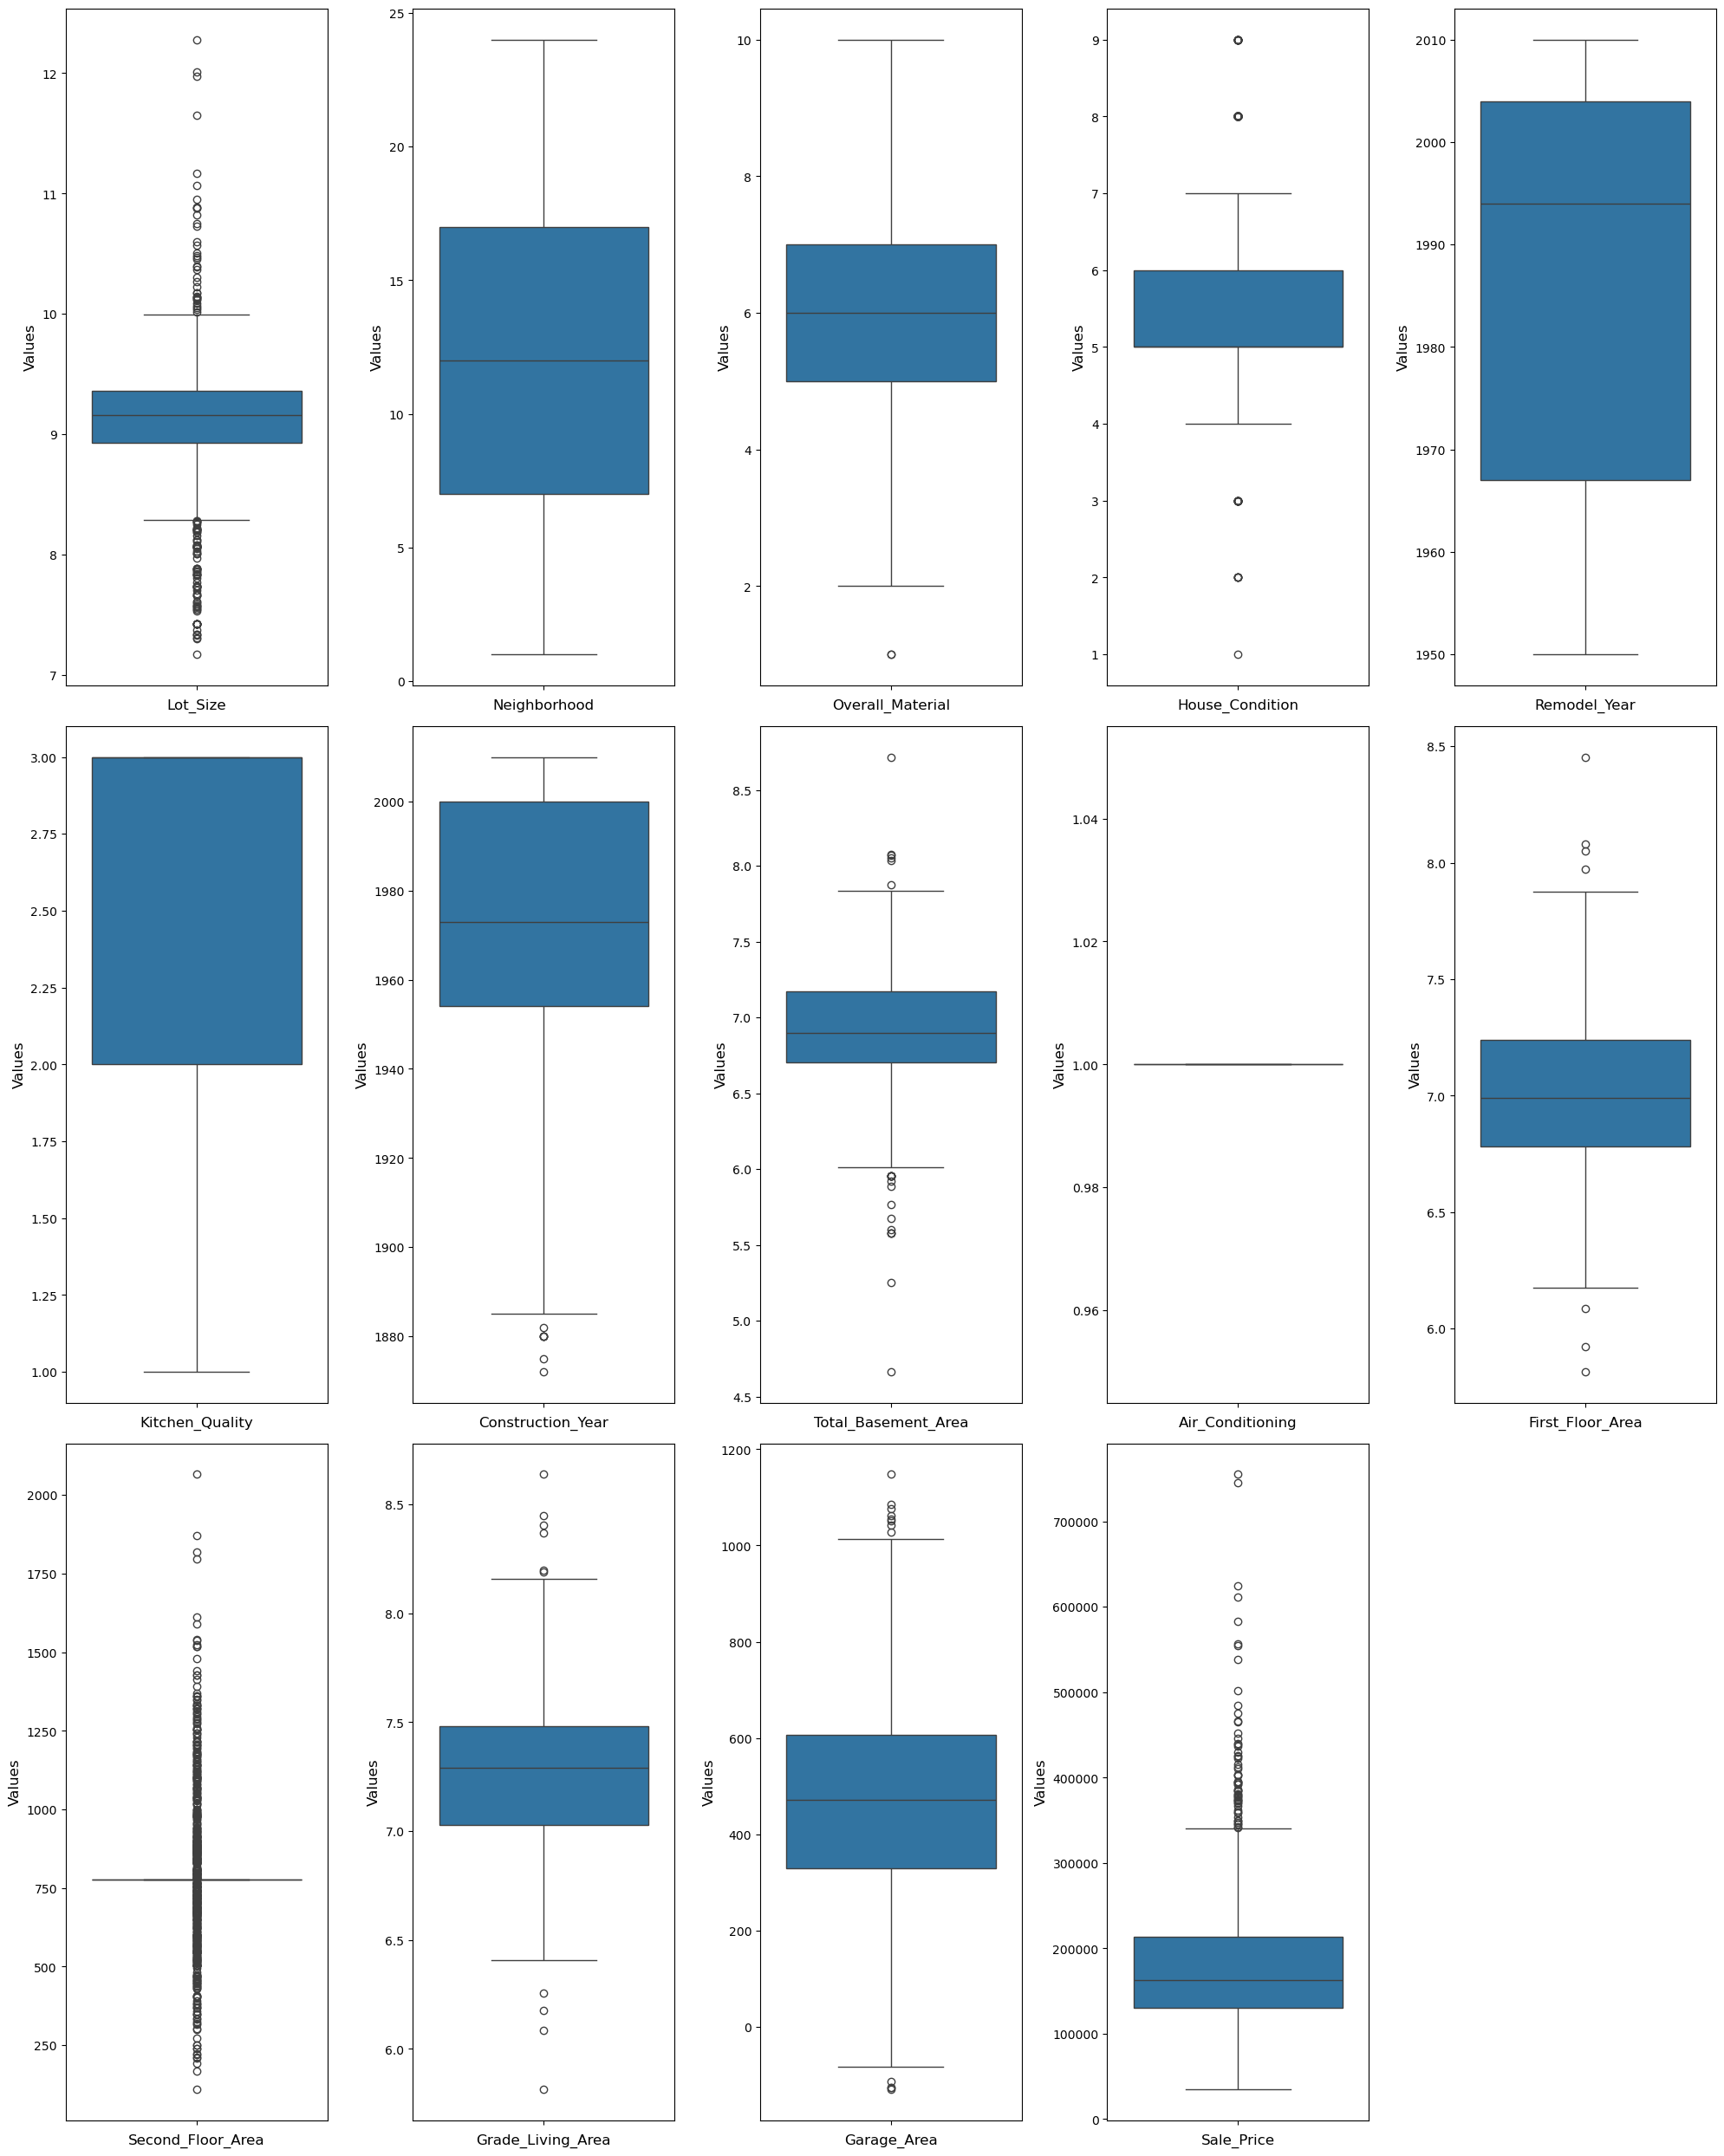

In [41]:
# step 5: check the outliers

plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(y=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [42]:
# Removing the outlier

def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

In [43]:
columns_to_impute = ['Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition', 'Remodel_Year', 'Kitchen_Quality',
                     'Construction_Year', 'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area', 'Second_Floor_Area',
                     'Grade_Living_Area', 'Garage_Area']

# Apply the function to each column
for col in columns_to_impute:
    df = impute_outliers_iqr(new_data, col)
df.head()

,Lot_Size,Neighborhood,Overall_Material,House_Condition,Remodel_Year,Kitchen_Quality,Construction_Year,Total_Basement_Area,Air_Conditioning,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Garage_Area,Sale_Price
0,9.042040,5.0,7.0,5.0,2003.0,2.0,2003.0,6.753438,1.0,6.753438,776.0,7.444833,471.028116,208500
1,9.169623,24.0,6.0,5.0,1976.0,3.0,1976.0,7.141245,1.0,7.141245,776.0,7.141245,196.316304,181500
2,9.328212,5.0,7.0,5.0,2002.0,2.0,2001.0,6.825460,1.0,6.825460,776.0,7.488294,218.068403,223500
3,9.164401,6.0,7.0,5.0,1970.0,2.0,1915.0,6.629363,1.0,6.869014,776.0,7.448916,696.996439,140000
4,9.565284,15.0,8.0,5.0,2000.0,2.0,2000.0,7.044033,1.0,7.044033,776.0,7.695758,568.859882,250000


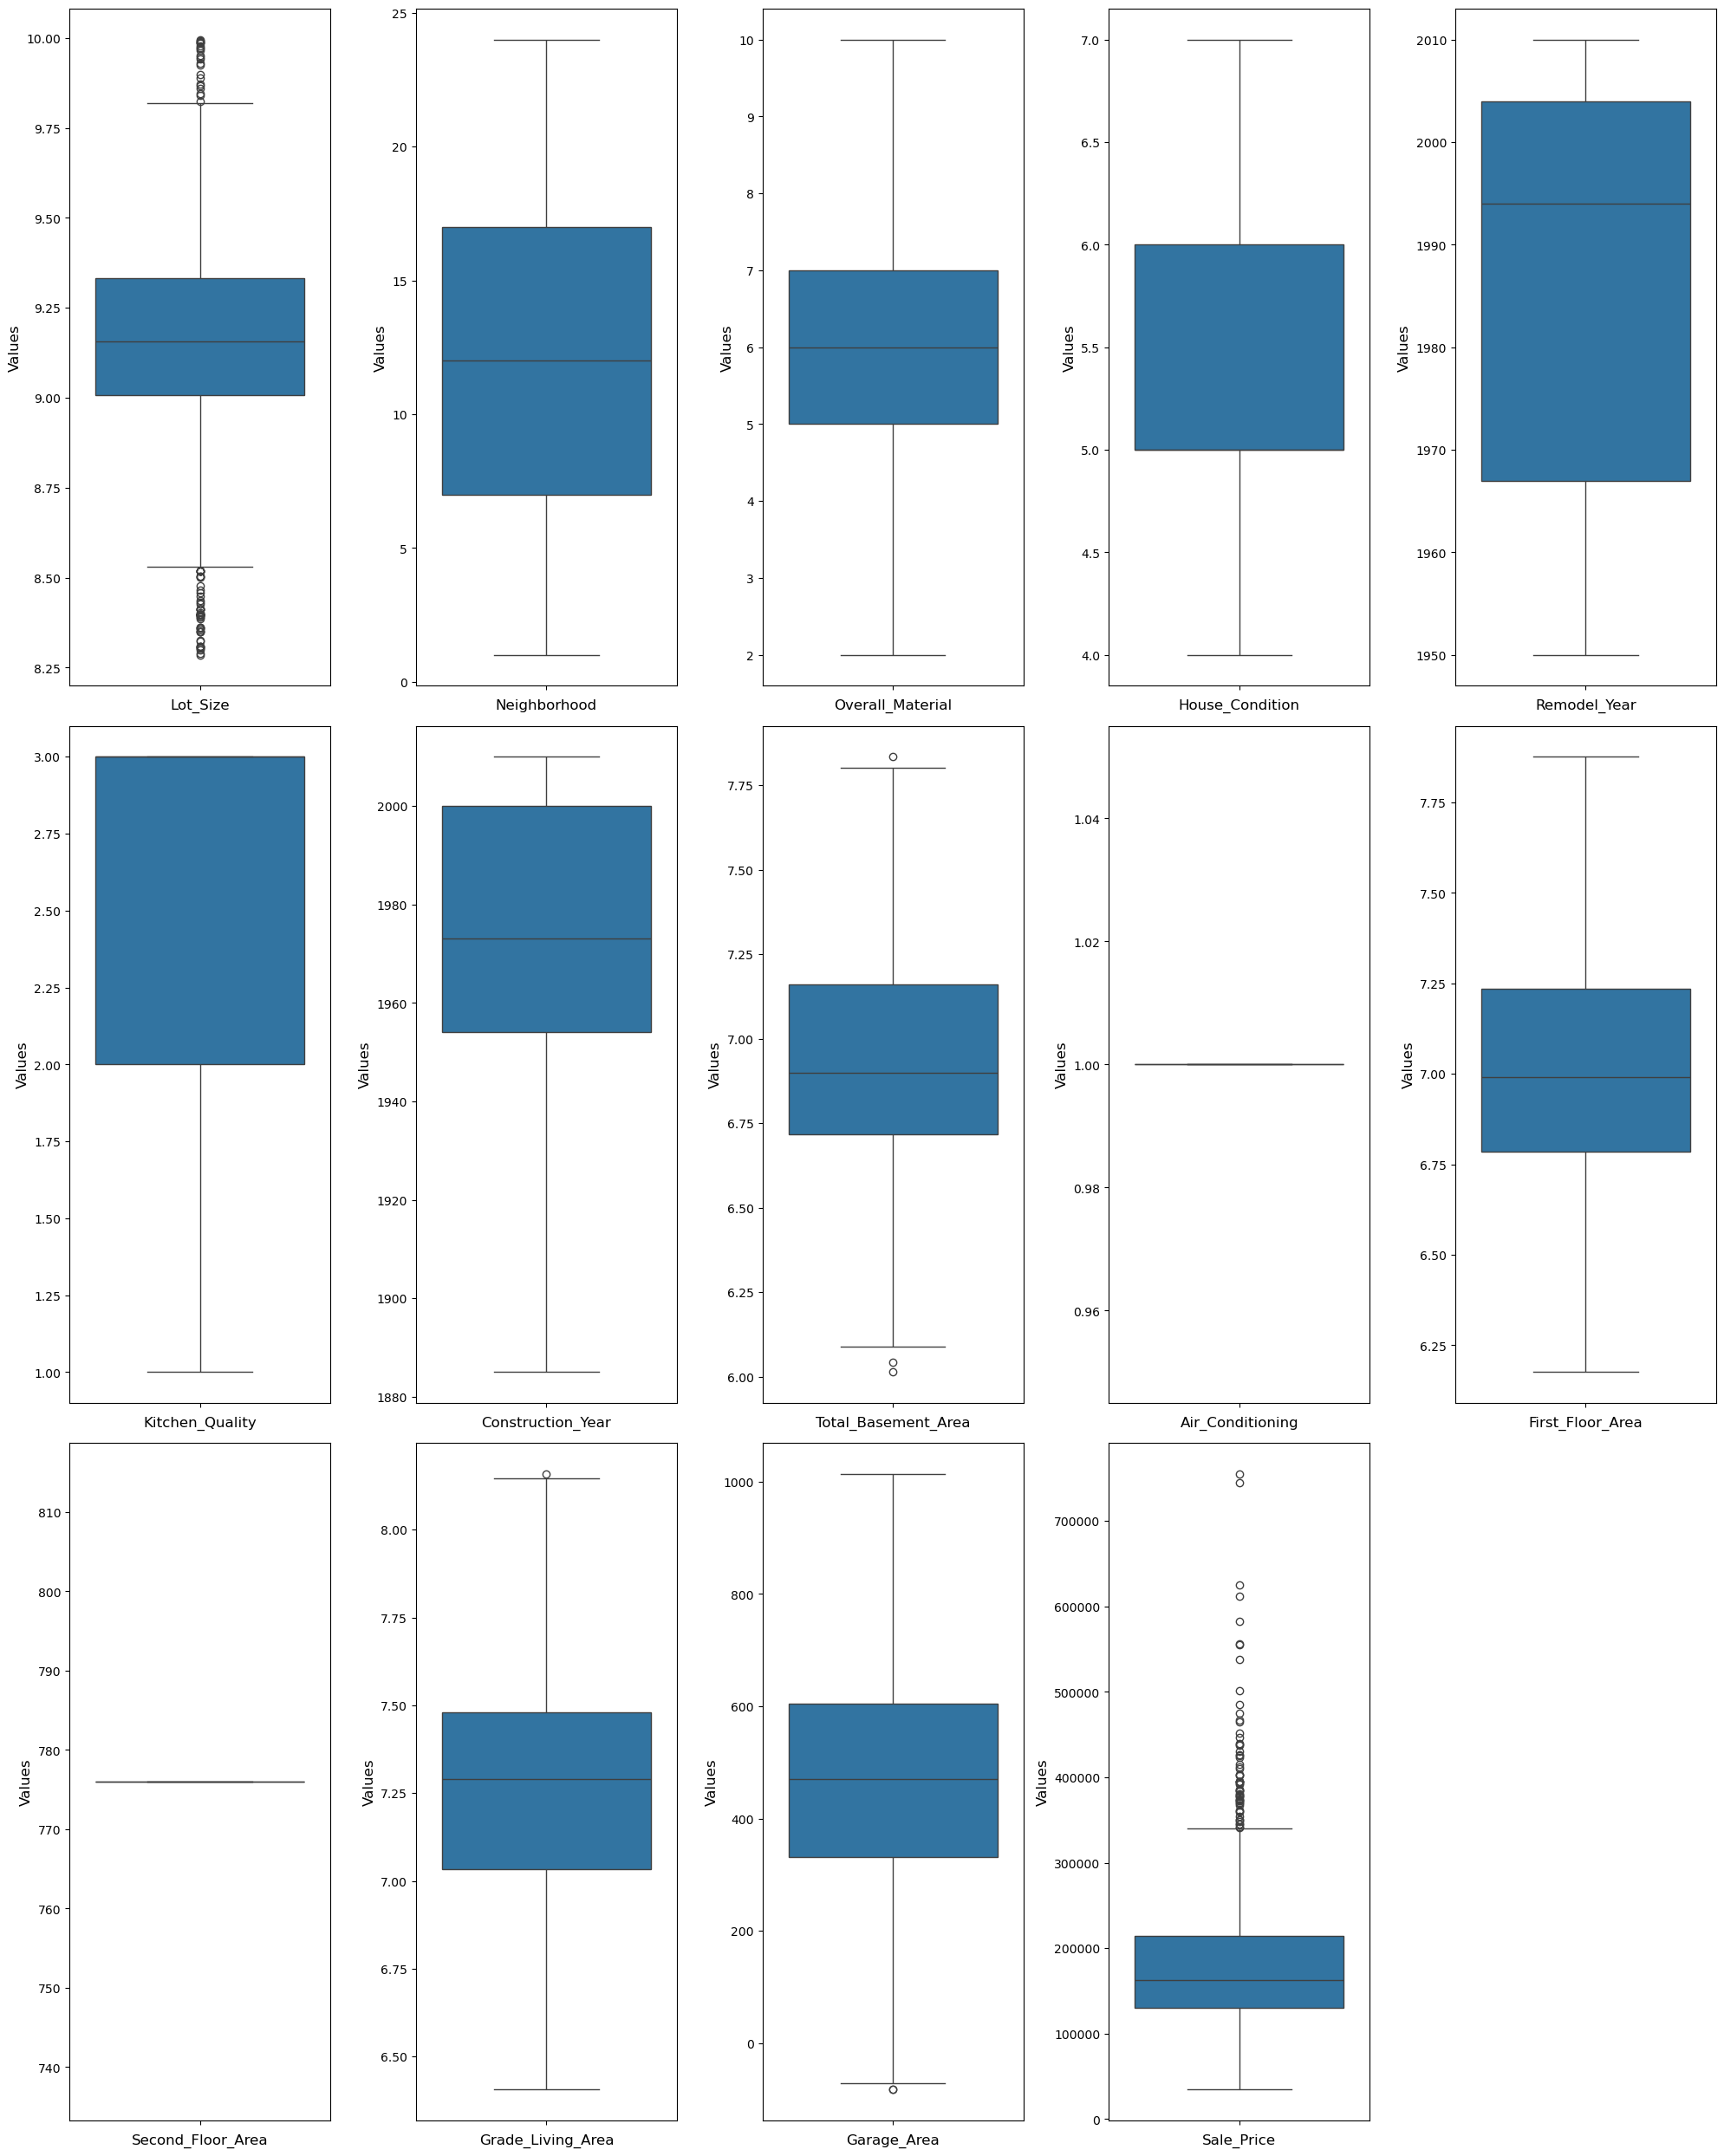

In [44]:
# After Applying IQR 

plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(y=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

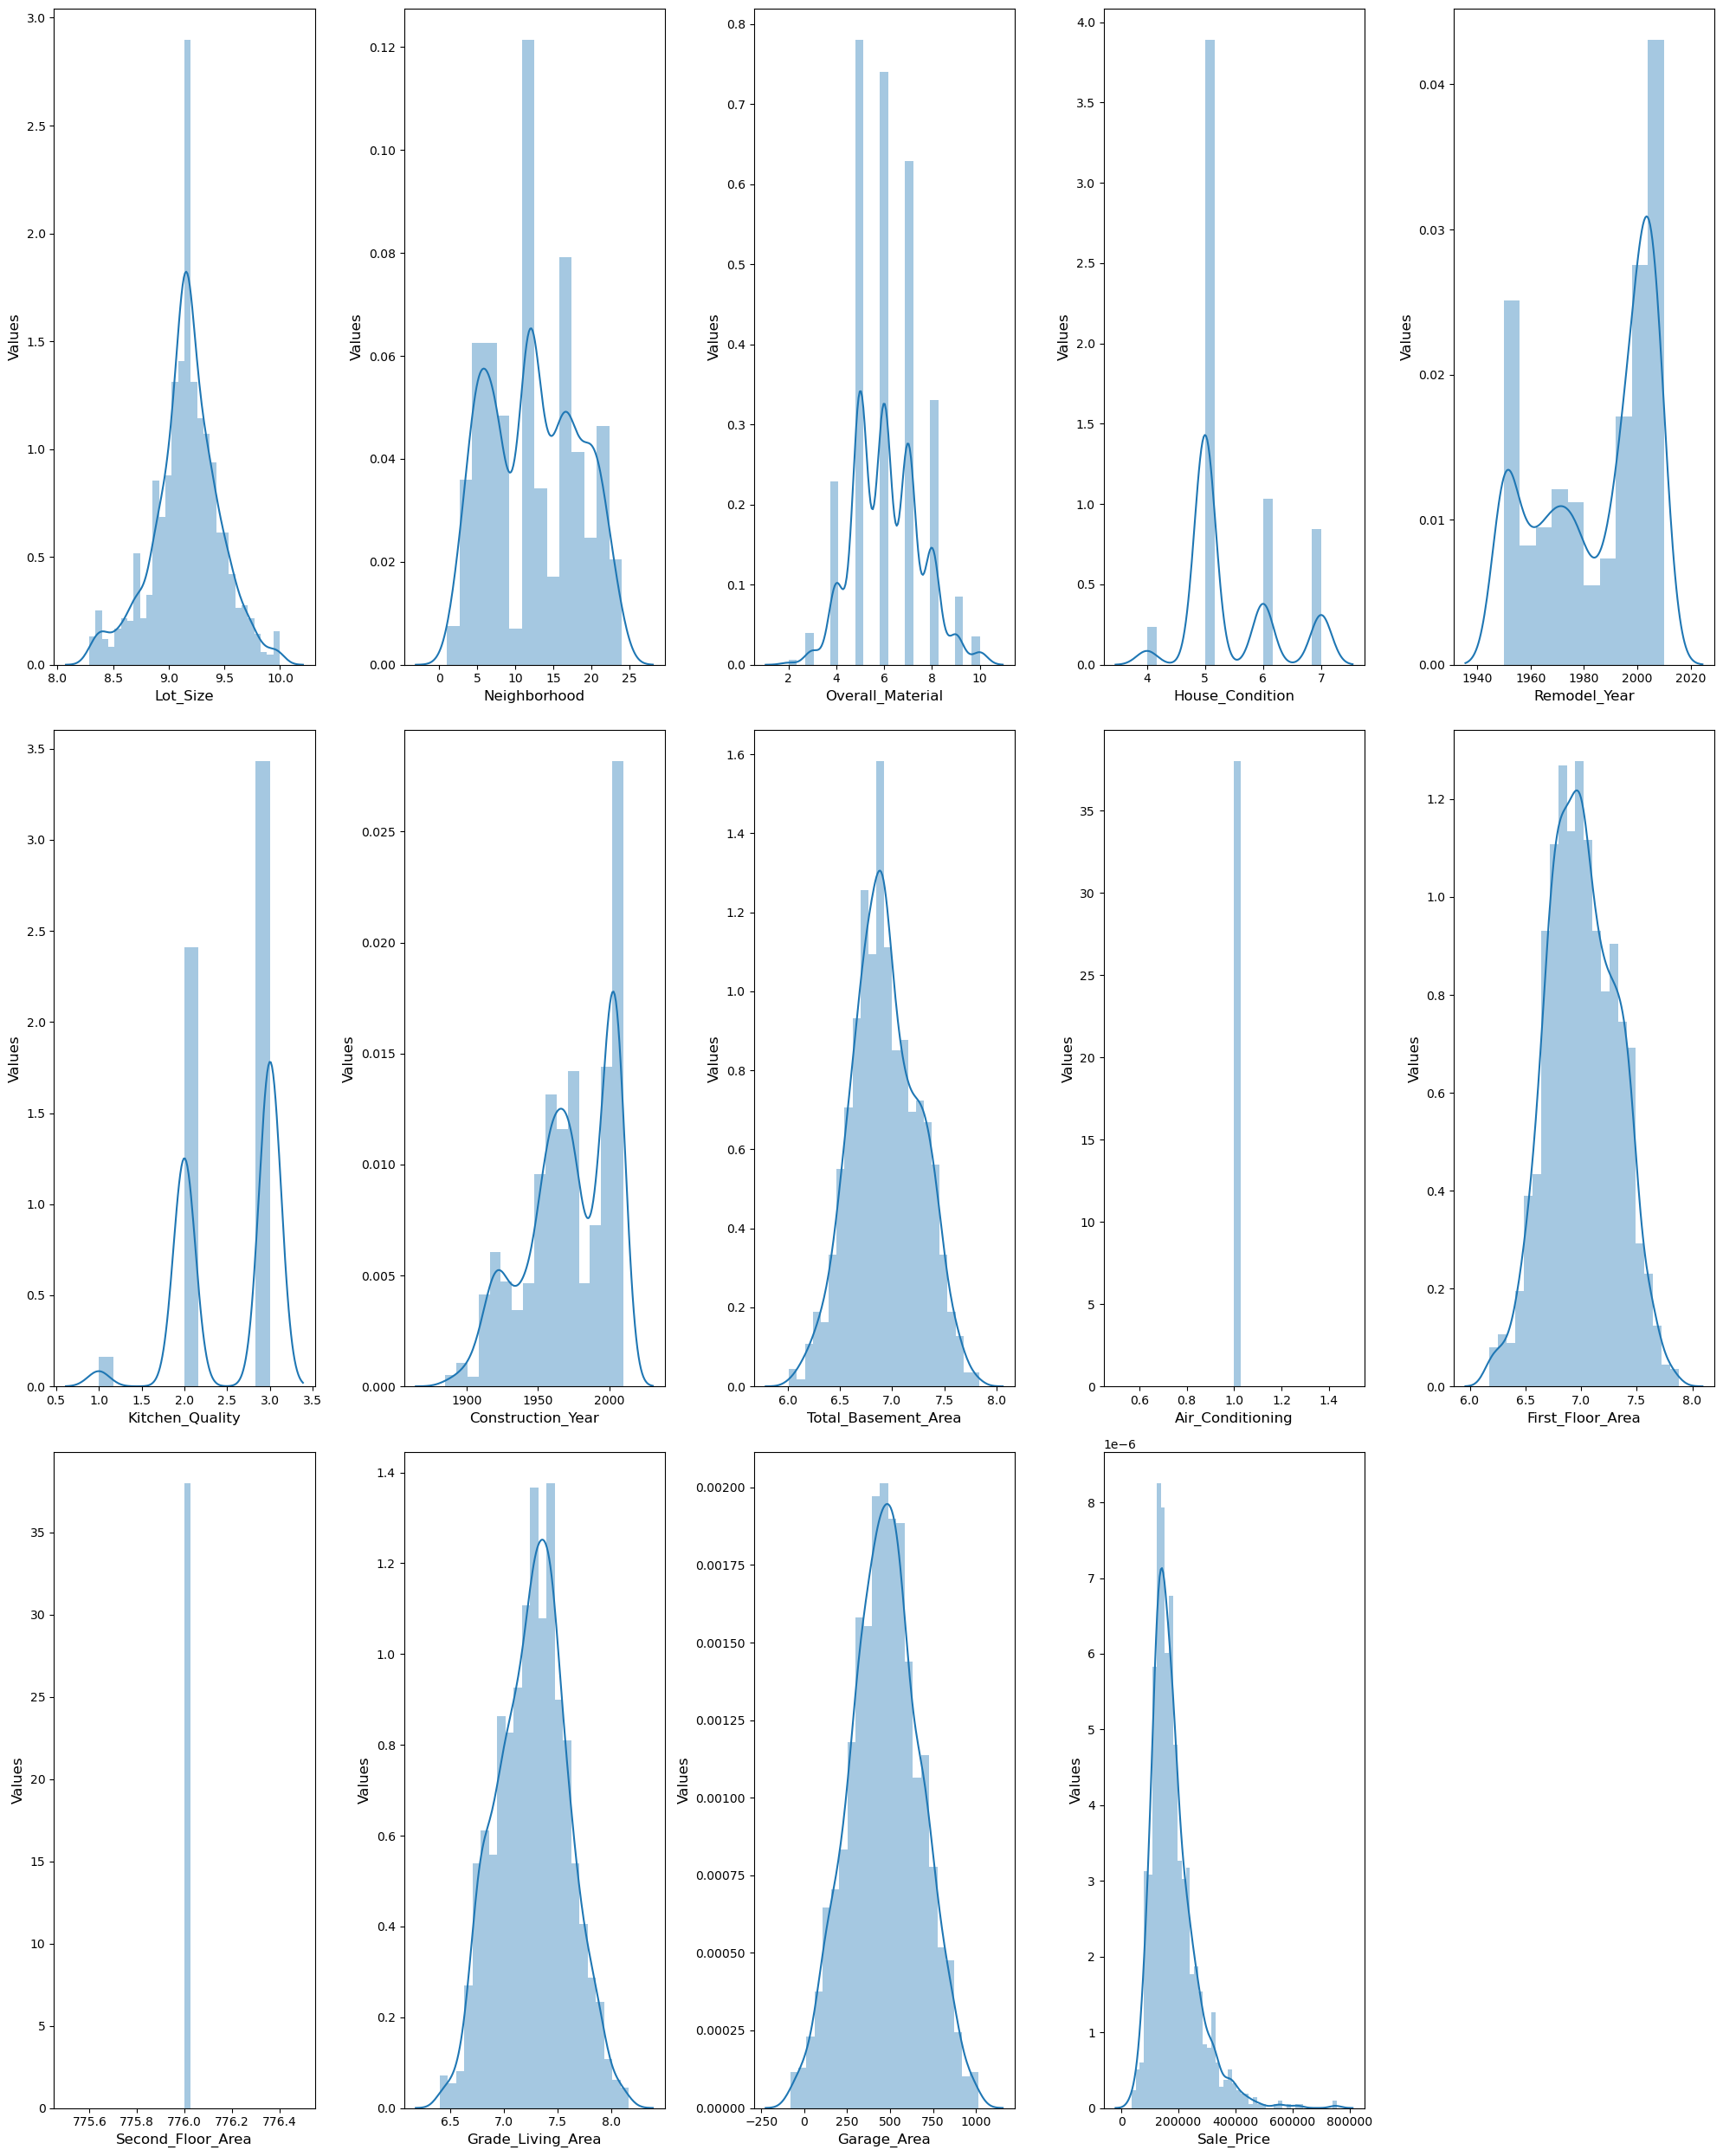

In [45]:
plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.distplot(x=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

# Feature Scaling

In [115]:
new_data.drop('First_Floor_Area', axis=1, inplace=True)
new_data.drop('Second_Floor_Area', axis=1, inplace=True)

In [117]:
new_data.head()

,Lot_Size,Neighborhood,Overall_Material,House_Condition,Remodel_Year,Kitchen_Quality,Construction_Year,Total_Basement_Area,Air_Conditioning,Grade_Living_Area,Garage_Area,Sale_Price
0,9.042040,5.0,7.0,5.0,2003.0,2.0,2003.0,6.753438,1.0,7.444833,471.028116,208500
1,9.169623,24.0,6.0,5.0,1976.0,3.0,1976.0,7.141245,1.0,7.141245,196.316304,181500
2,9.328212,5.0,7.0,5.0,2002.0,2.0,2001.0,6.825460,1.0,7.488294,218.068403,223500
3,9.164401,6.0,7.0,5.0,1970.0,2.0,1915.0,6.629363,1.0,7.448916,696.996439,140000
4,9.565284,15.0,8.0,5.0,2000.0,2.0,2000.0,7.044033,1.0,7.695758,568.859882,250000


In [153]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
no_scale_needed_col = ['Neighborhood', 'Air_Conditioning', 'Sale_Price', 
                       'Overall_Material', 'House_Condition', 'Kitchen_Quality']
scaled_data = sc.fit_transform(new_data.drop(no_scale_needed_col, axis=1))

In [155]:
con_data = new_data[['Neighborhood', 'Air_Conditioning', 'Overall_Material', 'House_Condition', 'Kitchen_Quality', 'Sale_Price']]

In [157]:
# new_data.columns

In [159]:
data2 = pd.DataFrame(scaled_data, columns=['Lot_Size',
       'Remodel_Year', 'Construction_Year',
       'Total_Basement_Area',
        'Grade_Living_Area', 'Garage_Area'])

In [161]:
final_df = pd.concat([data2, con_data], axis=1)

In [163]:
final_df

,Lot_Size,Remodel_Year,Construction_Year,Total_Basement_Area,Grade_Living_Area,Garage_Area,Neighborhood,Air_Conditioning,Overall_Material,House_Condition,Kitchen_Quality,Sale_Price
0,-0.385382,0.877986,1.059935,-0.564592,0.555389,0.008558,5.0,1.0,7.0,5.0,2.0,208500
1,0.039234,-0.430226,0.144859,0.648261,-0.395126,-1.341347,24.0,1.0,6.0,5.0,3.0,181500
2,0.567048,0.829534,0.992152,-0.339345,0.691460,-1.234460,5.0,1.0,7.0,5.0,2.0,223500
3,0.021857,-0.720940,-1.922536,-0.952631,0.568172,1.118942,6.0,1.0,7.0,5.0,2.0,140000
4,1.356063,0.732629,0.958260,0.344233,1.341018,0.489293,15.0,1.0,8.0,5.0,2.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.782261,0.974891,1.093827,0.545052,-0.498450,1.079948,21.0,1.0,7.0,5.0,2.0,185000
1455,-0.602199,0.732629,0.924368,-0.229247,0.437930,0.859016,8.0,1.0,6.0,5.0,3.0,175000
1456,1.092700,0.151202,0.212642,1.274500,1.157785,-1.417277,14.0,1.0,6.0,6.0,3.0,210000
1457,-0.160044,1.023343,-1.041351,0.363278,1.536938,-0.147036,6.0,1.0,7.0,5.0,2.0,266500


# Feature Selection

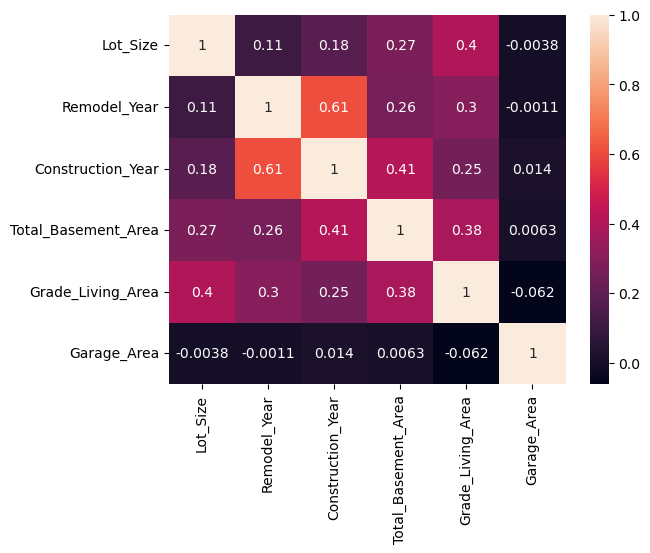

In [166]:
sns.heatmap(data2.corr(), annot=True)
plt.show()

# Model Creation 

In [169]:
# step 1: creating depending and independent variable

x = final_df.iloc[:,:-1]
y = final_df.Sale_Price

In [171]:
x

,Lot_Size,Remodel_Year,Construction_Year,Total_Basement_Area,Grade_Living_Area,Garage_Area,Neighborhood,Air_Conditioning,Overall_Material,House_Condition,Kitchen_Quality
0,-0.385382,0.877986,1.059935,-0.564592,0.555389,0.008558,5.0,1.0,7.0,5.0,2.0
1,0.039234,-0.430226,0.144859,0.648261,-0.395126,-1.341347,24.0,1.0,6.0,5.0,3.0
2,0.567048,0.829534,0.992152,-0.339345,0.691460,-1.234460,5.0,1.0,7.0,5.0,2.0
3,0.021857,-0.720940,-1.922536,-0.952631,0.568172,1.118942,6.0,1.0,7.0,5.0,2.0
4,1.356063,0.732629,0.958260,0.344233,1.341018,0.489293,15.0,1.0,8.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.782261,0.974891,1.093827,0.545052,-0.498450,1.079948,21.0,1.0,7.0,5.0,2.0
1455,-0.602199,0.732629,0.924368,-0.229247,0.437930,0.859016,8.0,1.0,6.0,5.0,3.0
1456,1.092700,0.151202,0.212642,1.274500,1.157785,-1.417277,14.0,1.0,6.0,6.0,3.0
1457,-0.160044,1.023343,-1.041351,0.363278,1.536938,-0.147036,6.0,1.0,7.0,5.0,2.0


In [173]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int64

In [203]:
# step 2: creating training & Testing Model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [205]:
# step3: model creation

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [213]:
y_pred = LR.predict(x_test)

In [215]:
y_test

1354    235000
101     178000
1325     55000
1088    137500
476     208900
         ...  
1313    333168
1118    140000
285     164700
194     127000
318     260000
Name: Sale_Price, Length: 292, dtype: int64

In [217]:
y_pred

array([224030.56925937, 169670.46738168,  45422.24162194, 217964.89112548,
       211421.36416859, 144514.50129631, 174595.96322465, 213604.26280671,
       215221.47787213, 191893.92630748, 152520.83629091, 246663.51882707,
        63365.95879987, 368377.48226122, 149966.69746812, 236765.47177587,
       315962.23084031, 217434.3865333 , 122387.97138266, 278302.43489427,
       107725.87891024, 181338.66506219, 147639.75041569, 104444.695937  ,
       365012.77667596, 180760.40403464, 259131.48939667, 161909.05683676,
       232862.89940527, 112958.21992572, 132063.79871887, 186855.75913297,
       253809.75485962, 227940.08067679, 119340.59385634, 173606.42838872,
       155177.05412788, 251552.00203068, 214009.14364833, 116790.07664873,
       180173.56963134, 223028.36043605,    496.36204214, 240607.93944505,
       154528.96458272, 146569.61086851,  39974.00369353, 128946.84818511,
        91209.48107311, 144919.42636536, 173600.80455097,  90595.1038556 ,
       142844.39661934, 1

In [246]:
# Step 4: Model Evalution

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
r2score = r2_score(y_test, y_pred)
r2score
# 79% of data model is predicting right

0.7993768724264303

In [248]:
# calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.79)*(40-3)/(40-3-1)
adjusted_r2

0.7841666666666667

In [250]:
import math
mean_squared_error(y_test, y_pred)

1169928904.3763676

In [252]:
math.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

34204.22348740529

In [254]:
mae = mean_absolute_error(y_test, y_pred)
mae

24841.68997829854

In [256]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape * 100
# 15% error in predicting model

15.9725577161392